<a href="https://colab.research.google.com/github/COMM599-Fall2023/fall_2023/blob/main/student%20folders/fungn/final/fungn_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# open romance books file
path = "/content/drive/MyDrive/COMM599_fungn_final_datasets/romance_final_df.csv"
romance_books = pd.read_csv(path)
romance_books.head()

,index,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,...,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series
0,1,NaN,21,['811663'],US,en-US,"[{'count': '598', 'name': 'to-read'}, {'count'...",B01BLJGA9S,True,4.23,...,NaN,NaN,NaN,https://www.goodreads.com/book/show/29074693-p...,https://s.gr-assets.com/assets/nophoto/book/11...,29074693,149,46079519,"Prowled Darkness (Dante's Circle, #7)","Prowled Darkness (Dante's Circle, #7)"
1,2,1597371289,8,[],US,eng,"[{'count': '16215', 'name': 'classics'}, {'cou...",NaN,False,3.99,...,9.0,NaN,2005.0,https://www.goodreads.com/book/show/3209316-emma,https://s.gr-assets.com/assets/nophoto/book/11...,3209316,42,3360164,Emma,Emma
2,3,NaN,27,['938303'],US,en-GB,"[{'count': '25', 'name': 'to-read'}, {'count':...",B01HX6PENG,True,4.31,...,NaN,NaN,NaN,https://www.goodreads.com/book/show/30838933-g...,https://s.gr-assets.com/assets/nophoto/book/11...,30838933,139,51437308,"Guardian Cougar (Finding Fatherhood, #2)","Guardian Cougar (Finding Fatherhood, #2)"
3,4,NaN,15,[],US,eng,"[{'count': '1492', 'name': 'to-read'}, {'count...",B013Q70BQG,True,3.98,...,NaN,NaN,NaN,https://www.goodreads.com/book/show/27419760-w...,https://images.gr-assets.com/books/1457306424m...,27419760,167,46003673,Wedding Girl,Wedding Girl
4,5,NaN,1,['584334'],US,en-US,"[{'count': '341', 'name': 'to-read'}, {'count'...",B00HWK35OY,True,3.79,...,NaN,NaN,NaN,https://www.goodreads.com/book/show/20566082-a...,https://s.gr-assets.com/assets/nophoto/book/11...,20566082,53,32222419,"A Kitty in the Lion's Den (Sweet Water, #3)","A Kitty in the Lion's Den (Sweet Water, #3)"


In [4]:
# remove unnecessary columns

romance_books = romance_books.drop(columns= ['index', 'asin', 'kindle_asin', 'isbn', 'isbn13', 'text_reviews_count', 'series', 'country_code', 'language_code', 'popular_shelves', 'is_ebook', 'publication_month', 'edition_information', 'url', 'image_url', 'work_id', 'link', 'publication_day', 'description', 'format'])
romance_books.head()

,average_rating,similar_books,authors,publisher,num_pages,publication_year,book_id,ratings_count,title,title_without_series
0,4.23,"['25515353', '20483269', '25650829', '18913492...","[{'author_id': '5360266', 'role': ''}]",NaN,NaN,NaN,29074693,149,"Prowled Darkness (Dante's Circle, #7)","Prowled Darkness (Dante's Circle, #7)"
1,3.99,"['31242', '374380', '20564', '383206', '7891',...","[{'author_id': '1265', 'role': ''}]",Brilliance Audio,544.0,2005.0,3209316,42,Emma,Emma
2,4.31,[],"[{'author_id': '90411', 'role': ''}, {'author_...",NaN,NaN,NaN,30838933,139,"Guardian Cougar (Finding Fatherhood, #2)","Guardian Cougar (Finding Fatherhood, #2)"
3,3.98,"['386097', '7774253', '576667', '471907', '431...","[{'author_id': '47231', 'role': ''}]",NaN,NaN,NaN,27419760,167,Wedding Girl,Wedding Girl
4,3.79,"['22044544', '23694100', '18243587', '13542030...","[{'author_id': '3330668', 'role': ''}]",NaN,NaN,NaN,20566082,53,"A Kitty in the Lion's Den (Sweet Water, #3)","A Kitty in the Lion's Den (Sweet Water, #3)"


In [5]:
# check number of empty values per column

print(romance_books.isnull().sum())


average_rating               0
similar_books                0
authors                      0
publisher               123839
num_pages               136629
publication_year        101800
book_id                      0
ratings_count                0
title                        0
title_without_series         0
dtype: int64


(array([4.60000e+01, 0.00000e+00, 2.60000e+01, 7.30000e+01, 7.10000e+02,
        5.39700e+03, 4.02880e+04, 1.53140e+05, 1.24576e+05, 1.11920e+04]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

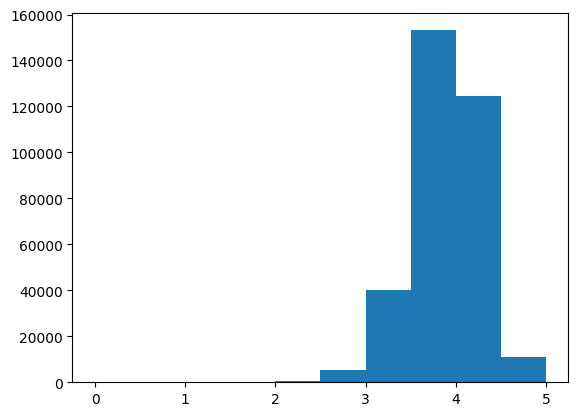

In [6]:
# Histogram of average ratings of romance books

plt.hist(romance_books['average_rating'])


In [7]:
# find number of romance books

length = romance_books.shape[0]
length


335448

In [8]:
# Opening interactions data

romance_interactions = pd.read_csv('/content/drive/MyDrive/COMM599_fungn_final_datasets/romance_interactions_chunk.csv')

In [9]:
# Finding the number of users in romance interactions

n_users = romance_interactions.user_id.unique().shape[0]
n_users

588

In [10]:
# Finding the number of books in romance interactions

n_books = romance_interactions.book_id.unique().shape[0]
n_books

13767

In [11]:
# list unique ratings

print(romance_interactions['rating'].unique())

[4 5 2 3 0 1]


In [12]:
# Remove unnecessary columns

romance_interactions = romance_interactions.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'review_id', 'is_read', 'review_text_incomplete', 'date_added', 'date_updated', 'read_at', 'started_at'])

In [13]:
# Merging both dataframes by book_id

df = pd.merge(romance_books, romance_interactions, on='book_id', how='inner')
df.head()

,average_rating,similar_books,authors,publisher,num_pages,publication_year,book_id,ratings_count,title,title_without_series,user_id,rating
0,3.89,"['1224327', '2123409', '691005', '959223', '10...","[{'author_id': '12935', 'role': ''}]",Zebra,507.0,1994.0,958988,352,"Princess of Fire (Fire, #1)","Princess of Fire (Fire, #1)",3f748d5642fbcc28e93dda06b74e87e2,5
1,3.89,"['1224327', '2123409', '691005', '959223', '10...","[{'author_id': '12935', 'role': ''}]",Zebra,507.0,1994.0,958988,352,"Princess of Fire (Fire, #1)","Princess of Fire (Fire, #1)",4a4a8e60702e892d9b35c47860e97e82,4
2,4.26,"['351572', '362206', '362204', '357096', '2210...","[{'author_id': '2614', 'role': ''}]",Ellora's Cave,358.0,2007.0,388678,1347,"Shameless Embraces (Bound Hearts, #6-7)","Shameless Embraces (Bound Hearts, #6-7)",a45e858447e808b39fe3b56f381440d7,5
3,4.36,"['29992024', '19459671', '29242560', '25865290...","[{'author_id': '7246093', 'role': ''}]",NaN,NaN,2017.0,25501128,1759,"Kept from You (Tear Asunder, #4)","Kept from You (Tear Asunder, #4)",f029b0ae8e28982b9d9dd97181b91ff7,4
4,3.38,"['6336101', '10953518', '11076946', '9993763',...","[{'author_id': '2654606', 'role': ''}]",Burlesque Press,57.0,2011.0,12458821,755,Awakening,Awakening,35dc073dd0025da5f6e8f456925dfab0,3


In [14]:
# Find number of ratings per book

agg_ratings = df.groupby('book_id').agg(number_of_ratings = ('rating', 'count')).reset_index()

In [15]:
# List unique number of ratings

print(sorted(agg_ratings['number_of_ratings'].unique()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 33, 35, 37, 38, 39, 43, 50, 56, 62, 72, 73, 98, 108, 151]


In [16]:
# Keep the movies with over 10 ratings
agg_ratings_GT10 = agg_ratings[agg_ratings['number_of_ratings']>10]
agg_ratings_GT10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 1 to 11830
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   book_id            105 non-null    int64
 1   number_of_ratings  105 non-null    int64
dtypes: int64(2)
memory usage: 2.5 KB


In [17]:
# Check popular books

agg_ratings_GT10.sort_values(by='number_of_ratings', ascending=False).head(20)

,book_id,number_of_ratings
3,1885,151
69,18135,108
4172,10818853,98
27,6185,73
4447,11857408,72
64,15931,62
709,227443,56
42,9416,50
5442,15507958,43
4365,11505797,39


In [19]:
# Adding the average_rating column

avg_rating = df['average_rating']
agg_ratings_GT10 = agg_ratings_GT10.join(avg_rating, how='inner')
agg_ratings_GT10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 1 to 11830
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   book_id            105 non-null    int64  
 1   number_of_ratings  105 non-null    int64  
 2   average_rating     105 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 3.3 KB


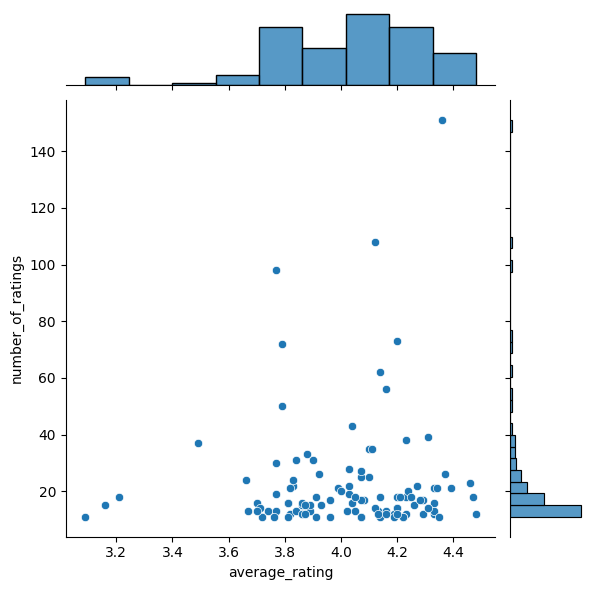

In [20]:
# Check correlation between average rating and number of ratings

sns.jointplot(x='average_rating', y='number_of_ratings', data=agg_ratings_GT10)